In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:

data = pd.read_csv('/content/Toddler Autism dataset July 2018.csv',
                   usecols=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex', 'Class/ASD Traits '])
data['Class/ASD Traits '] = data['Class/ASD Traits '].replace({'Yes': 1, 'No': 0})
data['Sex'] = data['Sex'].replace({'m': 1, 'f': 0})


In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1,0,1


In [ ]:

print('Shape of DataFrame: {}'.format(data.shape))
print(data.loc[0])

Shape of DataFrame: (1054, 12)
A1                   0
A2                   0
A3                   0
A4                   0
A5                   0
A6                   0
A7                   1
A8                   1
A9                   0
A10                  1
Sex                  0
Class/ASD Traits     0
Name: 0, dtype: int64


In [ ]:
data.loc[:10]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1,0,1
5,1,1,0,0,1,1,1,1,1,1,1,1
6,1,0,0,1,1,1,0,0,1,0,1,1
7,0,1,0,0,1,0,1,1,1,1,1,1
8,0,0,0,0,0,0,1,0,0,1,1,0
9,1,1,1,0,1,1,0,1,1,1,1,1


In [ ]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,0.697343,0.690702
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,0.459626,0.462424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.loc[:10]


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1,0,1
5,1,1,0,0,1,1,1,1,1,1,1,1
6,1,0,0,1,1,1,0,0,1,0,1,1
7,0,1,0,0,1,0,1,1,1,1,1,1
8,0,0,0,0,0,0,1,0,0,1,1,0
9,1,1,1,0,1,1,0,1,1,1,1,1


In [ ]:
x = data.drop("Class/ASD Traits ", axis=1)
y = data["Class/ASD Traits "]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

A1     int64
A2     int64
A3     int64
A4     int64
A5     int64
A6     int64
A7     int64
A8     int64
A9     int64
A10    int64
Sex    int64
dtype: object
int64


In [ ]:
print('X_train shape : ',  x_train.shape)
print('y_train shape : ',  y_train.shape)
print('X_test shape : ',  x_test.shape)
print('y_test shape : ',  y_test.shape)

X_train shape :  (706, 11)
y_train shape :  (706,)
X_test shape :  (348, 11)
y_test shape :  (348,)


In [ ]:
y_train.head()

639     1
1038    1
1022    0
218     1
397     1
Name: Class/ASD Traits , dtype: int64

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,429
Trainable params: 1,429
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(x_train.shape)


(706, 11)


In [ ]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 10,  validation_data=(x_test, y_test))

Epoch 1/25
71/71 [==============================] - 2s 7ms/step - loss: 0.5628 - accuracy: 0.7337 - val_loss: 0.4780 - val_accuracy: 0.7069
Epoch 2/25
71/71 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8499 - val_loss: 0.2511 - val_accuracy: 0.9109
Epoch 3/25
71/71 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9278 - val_loss: 0.1669 - val_accuracy: 0.9425
Epoch 4/25
71/71 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.9603 - val_loss: 0.1311 - val_accuracy: 0.9397
Epoch 5/25
71/71 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.9773 - val_loss: 0.0961 - val_accuracy: 0.9770
Epoch 6/25
71/71 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9887 - val_loss: 0.0849 - val_accuracy: 0.9655
Epoch 7/25
71/71 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9929 - val_loss: 0.0697 - val_accuracy: 0.9856
Epoch 8/25
71/71 [==

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Evaluation Loss: 0.012512597255408764
Evaluation Accuracy: 1.0


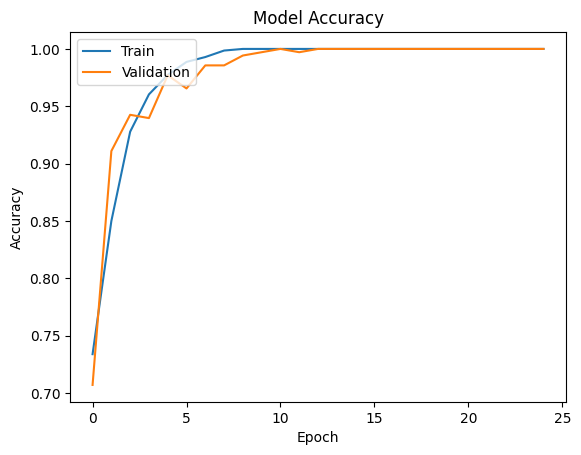

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

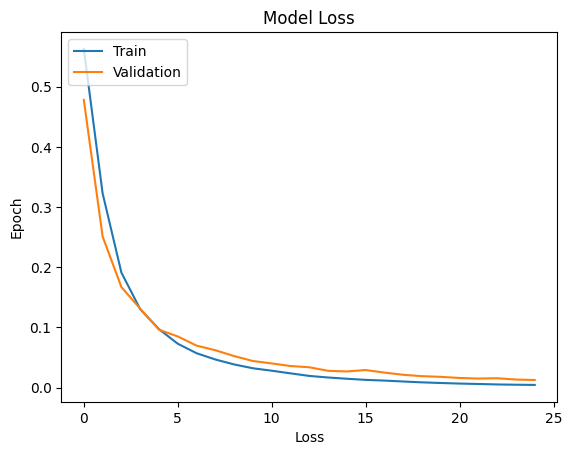

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model_01.h5')

# Simulasi


In [ ]:
# Daftar pertanyaan
pertanyaan = [
    "f/m? (m:1 f:0)",
    "Does your child look at you when you call his/her name?",
    "How easy is it for you to get eye contact with your child?",
    "Does your child point to indicate that s/he wants something?",
    "Does your child point to share interest with you?",
    "Does your child pretend?",
    "Does your child follow where you’re looking?",
    "If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them?",
    "Would you describe your child’s first words as: ",
    "Does your child use simple gestures?",
    "Does your child stare at nothing with no apparent purpose?"
]

# Membuat dataframe kosong untuk menyimpan jawaban
data = pd.DataFrame(columns=["Pertanyaan", "Jawaban"])

# Mengisi jawaban untuk setiap pertanyaan
for i, pertanyaan in enumerate(pertanyaan):
    jawaban = input(pertanyaan + " (0/1): ")
    data.loc[i] = [pertanyaan, jawaban]

# Menyimpan jawaban ke file CSV
data.to_csv("jawaban.csv", index=False)

# Menampilkan data yang telah disimpan
print("Data jawaban telah disimpan:")
print(data)

f/m? (m:1 f:0) (0/1): 1
Does your child look at you when you call his/her name? (0/1): 1
How easy is it for you to get eye contact with your child? (0/1): 1
Does your child point to indicate that s/he wants something? (0/1): 0
Does your child point to share interest with you? (0/1): 0
Does your child pretend? (0/1): 0
Does your child follow where you’re looking? (0/1): 1
If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them? (0/1): 1
Would you describe your child’s first words as:  (0/1): 1
Does your child use simple gestures? (0/1): 0
Does your child stare at nothing with no apparent purpose? (0/1): 1
Data jawaban telah disimpan:
                                           Pertanyaan Jawaban
0                                      f/m? (m:1 f:0)       1
1   Does your child look at you when you call his/...       1
2   How easy is it for you to get eye contact with...       1
3   Does your child point to indicate that s/he wa...       0
4

In [ ]:
# Mengubah kolom Jawaban menjadi array
jawaban = data["Jawaban"].values.astype(int)
jawaban = jawaban.transpose()
jawaban

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
from keras.models import load_model


# Melakukan prediksi menggunakan model
model = load_model("model_01.h5")
x = np.expand_dims(jawaban, axis=0)
prediksi = model.predict(x)

# Menampilkan hasil prediksi
prediksi

1/1 [==============================] - 0s 86ms/step


array([[0.99997973]], dtype=float32)

In [ ]:
["Yes" if prediksi >= 0.5 else "No" for prediksi in prediksi]

['Yes']

In [ ]:
tf.saved_model.save(model,'/content/TFLite/')

In [ ]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/TFLite')
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model_02.tflite')
tflite_model_file.write_bytes(tflite_model)

7808